Cache system - No_Cache
Average number of req served during simulations - 1001.3333333333334
Average Response rate for the requests - 74.91956374811808
Average Queue delay in the process - 72.9771585256283


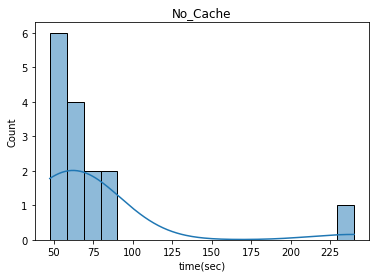



*********************XXXXXXXXXXXXXX*********************


Cache system - LFU_Cache
Average number of req served during simulations - 1006.6
Average Response rate for the requests - 32.86605556930247
Average Queue delay in the process - 41.867528807327


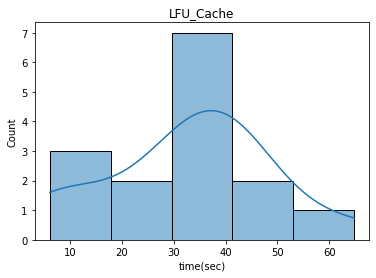



*********************XXXXXXXXXXXXXX*********************


Cache system - LRU_Cache
Average number of req served during simulations - 1003.1333333333333
Average Response rate for the requests - 36.98408882490857
Average Queue delay in the process - 46.738101635886686


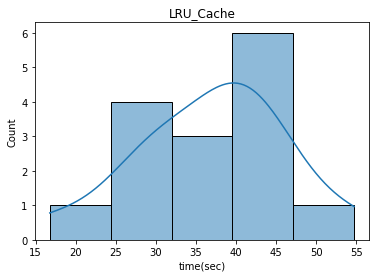



*********************XXXXXXXXXXXXXX*********************


Cache system - MRU_Cache
Average number of req served during simulations - 987.7333333333333
Average Response rate for the requests - 38.84916427834552
Average Queue delay in the process - 46.03786115393882


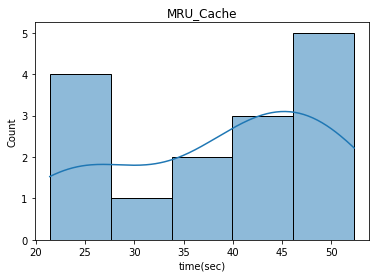



*********************XXXXXXXXXXXXXX*********************




In [4]:
from parameters import *
from cache import *
from infra import *
from events import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


POISSON_PROCESS_NEW_REQUESTS_LAMBDA = 100
PARETO_PROCESS_NEW_FILE_SIZE_A = 1
PARETO_PROCESS_NEW_FILE_SIZE_M = 1
PARETO_PROCESS_FILE_POPULARITY_A = 1
PARETO_PROCESS_FILE_POPULARITY_M = 1
LOGNORMAL_PROCESS_ARRIVE_AT_QUEUE_MEAN = 0.5
LOGNORMAL_PROCESS_ARRIVE_AT_QUEUE_SIGMA = 0.4

TOTAL_NO_OF_FILES = 10000
INSTITUTIONAL_BANDWIDTH = 1000
ACCESS_LINK_BANDWIDTH = 15
TOTAL_TIME_TO_RUN = 10
CACHE_CAPACITY = 50
CACHE_MAX_ALLOWED_FILE_SIZE = 10
SIMULATOR_ITERATIONS = 15

cache_types = [No_Cache,LFU_Cache,LRU_Cache,MRU_Cache]
for cache_type in cache_types:
    total_times = []
    queue_delays = []
    req_served = []
    for iteration in range(SIMULATOR_ITERATIONS):

        # initialize simulator environment
        files = Files()
        cache = cache_type(files)
        # cache = Cache(files)

        sim = Simulator_Env(files,cache)

        #initialize new req events to be processed at every second
        for i in range(TOTAL_TIME_TO_RUN):
            E_get_new_reqs(sim,i)


        #Main simulator loop
        while(len(sim.sim_q.q)):

            e = sim.sim_q.pop()
            e.process()    


        total_times.append(np.mean(sim.get_total_times_for_reqs()))
        queue_delays.append(np.mean(sim.queue_delays))
        req_served.append(sim.req_count)

    print("Cache system - " + cache.__class__.__name__)
    print('Average number of req served during simulations - ' + str(np.mean(req_served)))
    print('Average Response rate for the requests - ' + str(np.mean(total_times)))
    print('Average Queue delay in the process - ' + str(np.mean(queue_delays)))
    p = sns.histplot(data=total_times,kde=True)
    p.set_xlabel('time(sec)')
    p.set_title(cache.__class__.__name__)
    # p.set_xlim(0,10)

    plt.show()
    print('\n')
    print('*********************XXXXXXXXXXXXXX*********************')
    print('\n')
